In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
test = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")
sample_submission = pd.read_csv("/kaggle/input/home-credit-default-risk/sample_submission.csv")

In [6]:
pd.options.display.max_columns = 200
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Подготовка данных
Так как целью ДЗ не ставится достижение score, то в качестве выборки возьмем 10 признаков из предыдущих ДЗ (по линейной регрессии и по деревьям).

In [10]:
selected_heads = ['SK_ID_CURR', 'AMT_INCOME_TOTAL','AMT_ANNUITY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'ENTRANCES_AVG', 'NONLIVINGAREA_AVG', 'FLOORSMAX_MEDI', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i, _head in enumerate(selected_heads):
    train[_head].fillna(0, inplace = True)
        
print('fillina done')

fillina done


# #0. Варьируем гиперпараметры бустинга 


**В качестве гиперпараметров возьмем:**  

n_estimators=[10, 20, .., 100]  
max_depth = [1, 2, .., 10]  
num_leaves = [10, 20, .., 100]  

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    train, train['TARGET'], test_size=0.33, random_state=42)

In [12]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

0.7147962140852717 0.7131332449448103
0.7232326086487106 0.7214012945359535
0.73012375559484 0.7271993557451424
0.7350042277670235 0.7313605677587379
0.7381752694276551 0.7339750615553691
0.7405607217950658 0.7358489395350017
0.7423536849251493 0.7371791668440286
0.7437962813052684 0.7379444824788679
0.7450991336124176 0.7387540810946351


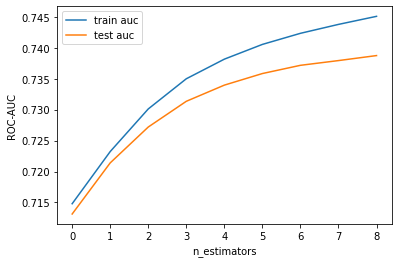

In [25]:
# n_estimators
auc_train_list = []
auc_test_list = []

for est in range(1, 10):
    clf1 = LGBMClassifier(max_depth=3,num_leaves=31, n_estimators=est*10)
    clf1.fit(X_train[selected_heads], y_train )
    predict_test = clf1.predict_proba(X_test[selected_heads] )[:,1]
    predict_train = clf1.predict_proba(X_train[selected_heads] )[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test )
    auc_train = roc_auc_score(y_train, predict_train )
    print(auc_train, auc_test )
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('n_estimators')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

0.7228927688122201 0.7229663753084881
0.7376386203465328 0.7347379729232937
0.746075175821679 0.7391959819226258
0.7557838369805296 0.740776038559712
0.7707497994502694 0.740472994042852
0.7768162343772689 0.740403732153824
0.7795777750256501 0.7409036910134128
0.7810372486413071 0.7395983278094003
0.781473733977917 0.7393895894086654


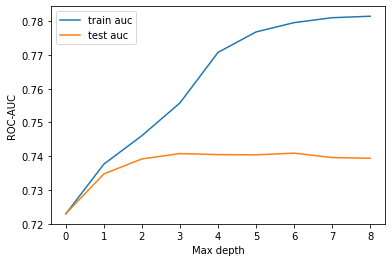

In [21]:
# Max_depth
auc_train_list = []
auc_test_list = []

for m_d in range(1, 10):
    clf2 = LGBMClassifier(max_depth=m_d,num_leaves=31, n_estimators=50)
    clf2.fit(X_train[selected_heads], y_train )
    predict_test = clf2.predict_proba(X_test[selected_heads] )[:,1]
    predict_train = clf2.predict_proba(X_train[selected_heads] )[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test )
    auc_train = roc_auc_score(y_train, predict_train )
    print(auc_train, auc_test )
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('Max depth')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

0.7120372755277882 0.7128228602881526
0.7255235231748545 0.7248646251914015
0.7310813634553678 0.7300276155259028
0.7335182494008002 0.731662003053039
0.7351731479145891 0.7321029036426536
0.7364407739933823 0.7327001284266488
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.7381752694276551 0.7339750615553691
0.73817526942

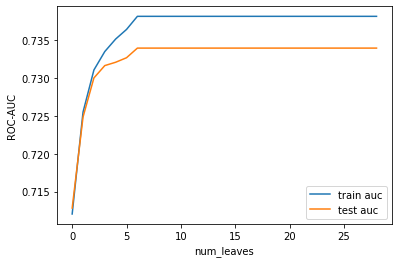

In [29]:
# num_leaves
auc_train_list = []
auc_test_list = []

for n_l in range(2, 31):
    clf3 = LGBMClassifier(max_depth=3,num_leaves=n_l, n_estimators=50)
    clf3.fit(X_train[selected_heads], y_train )
    predict_test = clf3.predict_proba(X_test[selected_heads] )[:,1]
    predict_train = clf3.predict_proba(X_train[selected_heads] )[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test )
    auc_train = roc_auc_score(y_train, predict_train )
    print(auc_train, auc_test )
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('num_leaves')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

**Выводы к подбору гиперпараметров**:  
1) Ограничение n_estimators позволяет снизить переобучение  
2) При увеличении max_depth растет переобучение, наибольший "разрыв" происходит при глубине более 3. Но также, данное ограничение, позволяет снизить переобучение при варьировании других гиперпараметров.  
3) При num_leaves > 6 не оказывает влияния на результат (и переобучение), при ограничении num_leavs можно снизить переобучение. 

# #1 Отбор наилучших параметров с помощью GridSearchCV и RandomizedSearchCV .

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# диапазон num_leaves сокртаил (относительно теста выше) из-за слишком долгого процесса
param_grid = { 'max_depth': range (1,10),
              'num_leaves': range(2, 10),
              'n_estimators': range (10,100,10) }

bm = LGBMClassifier()

In [42]:
grid = GridSearchCV(bm, param_grid, cv=5)
grid.fit(X_train[selected_heads], y_train)

print(grid.best_params_)
#результат {'max_depth': 7, 'n_estimators': 90, 'num_leaves': 8}

KeyboardInterrupt: 

In [41]:
n_iter_search = 20
random_search = RandomizedSearchCV(bm, param_grid, cv=5, n_iter = n_iter_search)
random_search.fit(X_train[selected_heads], y_train)

print(random_search.best_params_)
#результат {'num_leaves': 8, 'n_estimators': 90, 'max_depth': 9}

{'num_leaves': 8, 'n_estimators': 90, 'max_depth': 9}


# #2 Строим график с наилучшими фичами 

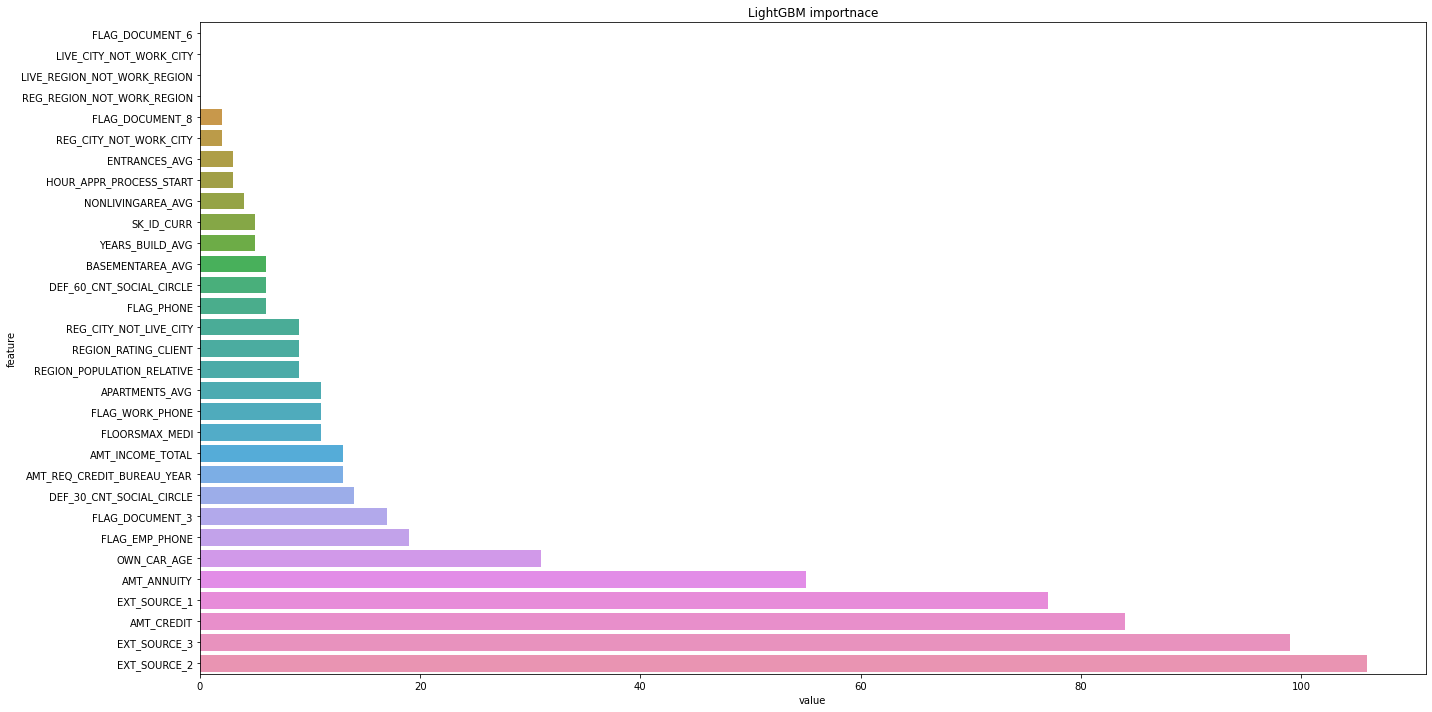

In [45]:
import seaborn as sns

bm = LGBMClassifier(random_state=42, n_estimators=90, max_depth=9, num_leaves=8)
bm.fit(X_train[selected_heads], y_train)


feature_imp = pd.DataFrame(sorted(zip(bm.feature_importances_,selected_heads)),
                           columns=['value','feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="value", y="feature", data=feature_imp.sort_values(by="value"))
plt.title('LightGBM importnace')
plt.tight_layout()
plt.show()

Наиболее значимыми оказались признаки: EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3 и AMT_CREDIT, AMT_ANNUITY

> ------------

# Стейкинг

In [ ]:
Подготовка данных (в связи с использованием регрессии)

In [54]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [61]:
norm_log_train = pd.DataFrame()
norm_heads = []

In [64]:
for i, head in enumerate(selected_heads):
    norm_log_train['LOG_'+head] = np.log1p(train[head])
    scaler.fit(norm_log_train[['LOG_'+head]])
    norm_log_train['NORM_LOG_'+head] = scaler.transform(norm_log_train[['LOG_'+head]])
    norm_heads.append('NORM_LOG_'+head)
    
print(norm_heads)

['NORM_LOG_SK_ID_CURR', 'NORM_LOG_AMT_INCOME_TOTAL', 'NORM_LOG_AMT_ANNUITY', 'NORM_LOG_AMT_CREDIT', 'NORM_LOG_REGION_POPULATION_RELATIVE', 'NORM_LOG_OWN_CAR_AGE', 'NORM_LOG_FLAG_EMP_PHONE', 'NORM_LOG_FLAG_WORK_PHONE', 'NORM_LOG_FLAG_PHONE', 'NORM_LOG_REGION_RATING_CLIENT', 'NORM_LOG_HOUR_APPR_PROCESS_START', 'NORM_LOG_REG_REGION_NOT_WORK_REGION', 'NORM_LOG_LIVE_REGION_NOT_WORK_REGION', 'NORM_LOG_REG_CITY_NOT_LIVE_CITY', 'NORM_LOG_REG_CITY_NOT_WORK_CITY', 'NORM_LOG_LIVE_CITY_NOT_WORK_CITY', 'NORM_LOG_EXT_SOURCE_1', 'NORM_LOG_EXT_SOURCE_2', 'NORM_LOG_EXT_SOURCE_3', 'NORM_LOG_APARTMENTS_AVG', 'NORM_LOG_BASEMENTAREA_AVG', 'NORM_LOG_YEARS_BUILD_AVG', 'NORM_LOG_ENTRANCES_AVG', 'NORM_LOG_NONLIVINGAREA_AVG', 'NORM_LOG_FLOORSMAX_MEDI', 'NORM_LOG_DEF_30_CNT_SOCIAL_CIRCLE', 'NORM_LOG_DEF_60_CNT_SOCIAL_CIRCLE', 'NORM_LOG_FLAG_DOCUMENT_3', 'NORM_LOG_FLAG_DOCUMENT_6', 'NORM_LOG_FLAG_DOCUMENT_8', 'NORM_LOG_AMT_REQ_CREDIT_BUREAU_YEAR']


Модель логистической регрессии

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lm = LogisticRegression(max_iter = 1000)
cross = cross_val_score(lm, norm_log_train[norm_heads],  y = train['TARGET'], cv = 5, scoring= 'roc_auc')
print("model_1 = {}".format(np.mean(cross)))

#1 model_1 = 0.7079468362443457

model_1 = 0.7079468362443457


**Модель случайного леса**

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
fm_1 = RandomForestClassifier(n_estimators = 30, max_depth = 3)
cross = cross_val_score(fm_2, norm_log_train[norm_heads],  y = train['TARGET'], cv = 5, scoring= 'roc_auc')
print("model_2 = {}".format(np.mean(cross)))

#2 model_2 0.7113863576633147

model_2 = 0.7113863576633147


In [67]:
fm_2 = RandomForestClassifier(n_estimators = 50, max_depth = 4)
cross = cross_val_score(fm_2, norm_log_train[norm_heads],  y = train['TARGET'], cv = 5, scoring= 'roc_auc')
print("model_3 = {}".format(np.mean(cross)))

#3 model_3 = 0.7104576798735709

model_3 = 0.7104576798735709


Модель градиентного бустинга

In [ ]:
from lightgbm import LGBMClassifier

In [71]:
bm_1 = LGBMClassifier(n_estimators = 90, max_depth = 9, num_leaves = 8)
cross = cross_val_score(bm_1, norm_log_train[norm_heads],  y = train['TARGET'], cv = 5, scoring= 'roc_auc')
print("model_4 = {}".format(np.mean(cross)))

#4 model_4 = 0.7375582669130821

model_4 = 0.7375582669130821


In [73]:
bm_2 = LGBMClassifier(n_estimators = 50, max_depth = 4, num_leaves = 4)
cross = cross_val_score(bm_2, norm_log_train[norm_heads],  y = train['TARGET'], cv = 5, scoring= 'roc_auc')
print("model_5 = {}".format(np.mean(cross)))

#5 model_5 = 0.7280343886678653

model_5 = 0.7280343886678653


# Стейкинг моделей

In [77]:
from sklearn.ensemble import StackingClassifier

In [78]:
estimators = [('fm_1',fm_1 ), ('fm_2',fm_2), ('bm_1',bm_1), ('log', bm_2), ('lm', lm)]
stacking = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

cross = cross_val_score(stacking, norm_log_train[norm_heads],  y = train['TARGET'], cv = 5, scoring= 'roc_auc')
print(np.mean(cross))

#0.7251667872121509

0.7251667872121509


Стейкинг не смог показать наилучшую метрику, чем при использовании каждой из моделей в отдельности.  
GBM в отдельности показал результат лучше

**Исключаем из стейкинга модель с наилучшей метрикой на кросс-валидации - bm_1 (градиентный бустинг)**

In [79]:
estimators = [('fm_1',fm_1 ), ('fm_2',fm_2), ('log', bm_2), ('lm', lm)]
stacking = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

cross = cross_val_score(stacking, norm_log_train[norm_heads],  y = train['TARGET'], cv = 5, scoring= 'roc_auc')
print(np.mean(cross))

# 0.7249459594658687

0.7249459594658687


Результат ухудшился по причине того, что исключен алгоритм, который чаще указывал на верный результат